In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
data=pd.read_csv('webmd.csv')

In [4]:
data.shape

(362806, 12)

In [5]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [6]:
data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [7]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [8]:
data['DrugId'].value_counts()

6873      8538
1025      7868
6007      7728
4398      5864
14208     5451
          ... 
78479        1
14766        1
165950       1
8244         1
18441        1
Name: DrugId, Length: 6572, dtype: int64

In [9]:
data=data.drop(data.loc[(data['DrugId']!=1025)].index)
data.shape

(7868, 12)

In [10]:
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [11]:
data.nunique()

Age                 9
Condition           7
Date             1328
Drug                4
DrugId              1
EaseofUse           5
Effectiveness       5
Reviews          1536
Satisfaction        5
Sex                 3
Sides               2
UsefulCount        42
dtype: int64

In [12]:
data=data.drop(['DrugId','Reviews','Date'],axis=1)

In [13]:
data.shape

(7868, 9)

In [14]:
data['Sides'].value_counts()

Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                         5901
Nausea ,  vomiting ,  constipation ,  dry mouth ,  weakness ,  sweating ,  lightheadedness ,  dizziness , or drowsiness may occur.    1967
Name: Sides, dtype: int64

In [15]:
for x in ['Age', 'Condition', 'Drug', 'EaseofUse',
       'Effectiveness', 'Satisfaction', 'Sex', 'Sides', 'UsefulCount']:
    data[x].replace(to_replace=[' '],value=data[x].mode()[0], inplace=True) 

In [16]:
data.shape

(7868, 9)

In [17]:
data['Sex'].value_counts()

Female    4380
Male      3488
Name: Sex, dtype: int64

In [18]:
data.nunique()
    

Age               8
Condition         7
Drug              4
EaseofUse         5
Effectiveness     5
Satisfaction      5
Sex               2
Sides             2
UsefulCount      42
dtype: int64

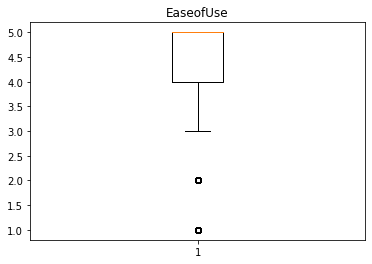

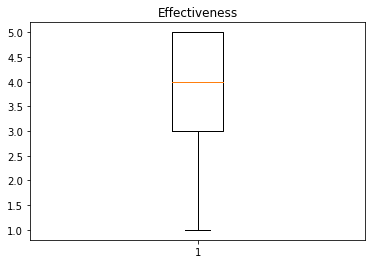

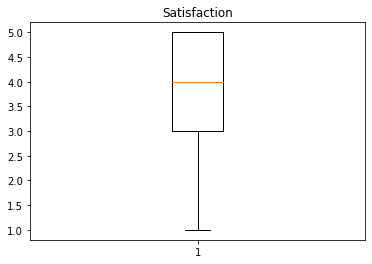

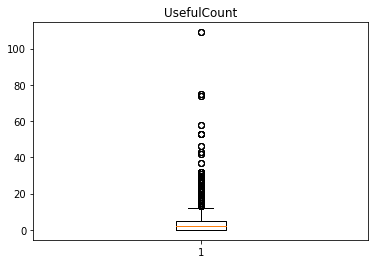

In [19]:
for i in ['EaseofUse','Effectiveness', 'Satisfaction','UsefulCount']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [20]:
Q1 = np.percentile(data['UsefulCount'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['UsefulCount'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['UsefulCount'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR


ind2 = data['UsefulCount']>up_lim
data.loc[ind2].index
data=data.drop(data.loc[ind2].index)
data.shape

(7332, 9)

In [21]:
data.tail()

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
60588,45-54,Neuropathic Pain,oxycodone hcl,5,5,5,Male,"Nausea , vomiting , constipation , lighthea...",3
60589,35-44,Pain,oxycodone hcl er,5,5,5,Female,"Nausea , vomiting , constipation , dry mout...",1
60590,25-34,Neuropathic Pain,oxycodone hcl,2,3,3,Female,"Nausea , vomiting , constipation , lighthea...",2
60591,45-54,Neuropathic Pain,oxycodone hcl er,5,5,5,Male,"Nausea , vomiting , constipation , dry mout...",3
60592,25-34,Neuropathic Pain,oxycodone hcl er,2,3,3,Female,"Nausea , vomiting , constipation , dry mout...",2


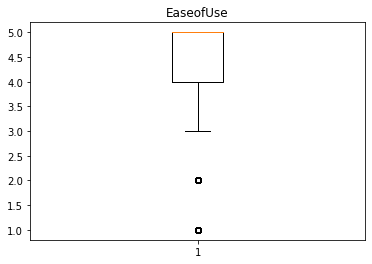

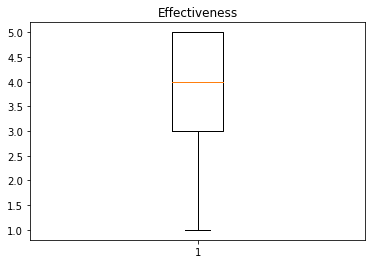

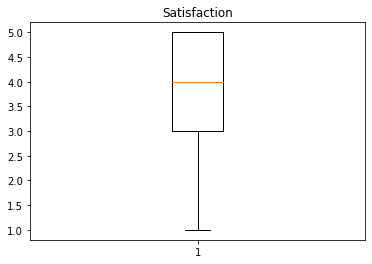

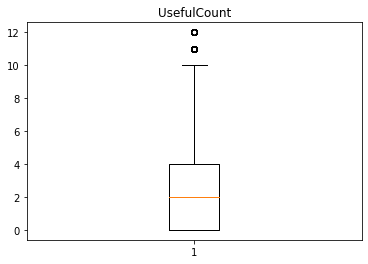

In [22]:
for i in ['EaseofUse','Effectiveness', 'Satisfaction','UsefulCount']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sides']=le.fit_transform(data['Sides'])


In [24]:
X=data.drop('Sides',axis=1)
y=data['Sides']

In [25]:
y.shape

(7332,)

In [26]:
X=pd.get_dummies(X)

In [27]:
X.shape

(7332, 25)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [29]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred=logit_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      1467
   macro avg       1.00      1.00      1.00      1467
weighted avg       1.00      1.00      1.00      1467



[0.9488752556237219,
 0.9652351738241309,
 0.9631901840490797,
 0.9863667348329925,
 0.9809134287661895,
 0.9856850715746421,
 0.9775051124744376,
 0.9870483980913429,
 0.9815950920245399,
 0.989093387866394,
 0.9809134287661895,
 0.9850034083162917]

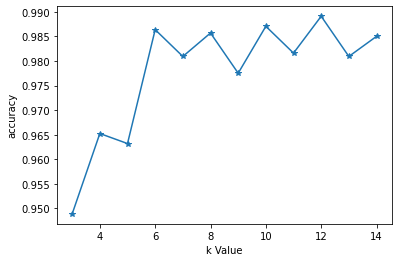

In [30]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    acc_values.append(acc)
plt.plot(neighbours,acc_values, '*-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
acc_values

In [31]:
classifier = KNeighborsClassifier(n_neighbors=12, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       356
           1       0.99      1.00      0.99      1111

    accuracy                           0.99      1467
   macro avg       0.99      0.98      0.98      1467
weighted avg       0.99      0.99      0.99      1467



In [32]:
from sklearn.svm import SVC
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred=svm_linear.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      1467
   macro avg       1.00      1.00      1.00      1467
weighted avg       1.00      1.00      1.00      1467



In [33]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      1467
   macro avg       1.00      1.00      1.00      1467
weighted avg       1.00      1.00      1.00      1467



In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      1467
   macro avg       1.00      1.00      1.00      1467
weighted avg       1.00      1.00      1.00      1467



In [35]:
pd.Series(rf.feature_importances_,index=X.columns.sort_values(ascending=False))

UsefulCount                                            0.000512
Sex_Male                                               0.000529
Sex_Female                                             0.000637
Satisfaction                                           0.000819
Effectiveness                                          0.000088
EaseofUse                                              0.000170
Drug_oxycodone tablet, oral only                       0.000099
Drug_oxycodone hcl solution                            0.000080
Drug_oxycodone hcl er                                  0.000126
Drug_oxycodone hcl                                     0.000112
Condition_Severe Pain with Opioid Tolerance            0.000165
Condition_Severe Pain                                  0.000117
Condition_Pain                                         0.000055
Condition_Other                                        0.000057
Condition_Neuropathic Pain                             0.000136
Condition_Chronic Pain with Narcotic Dru

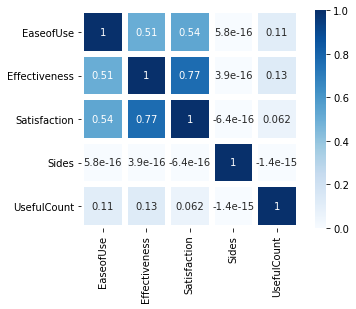

In [36]:
sns.heatmap(data.corr(),cbar=1, linewidths=5,vmax=1, vmin=0, square=True, cmap='Blues',annot=True)

Text(0.5, 1.0, 'Age_group Distribution')

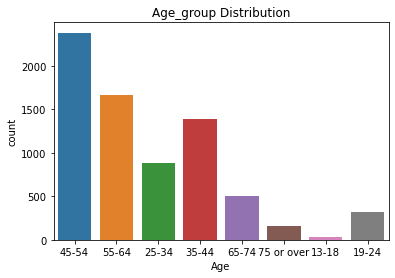

In [37]:
sns.countplot(data.Age)
plt.title("Age_group Distribution")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264DF86D1C0>,
      dtype=object)

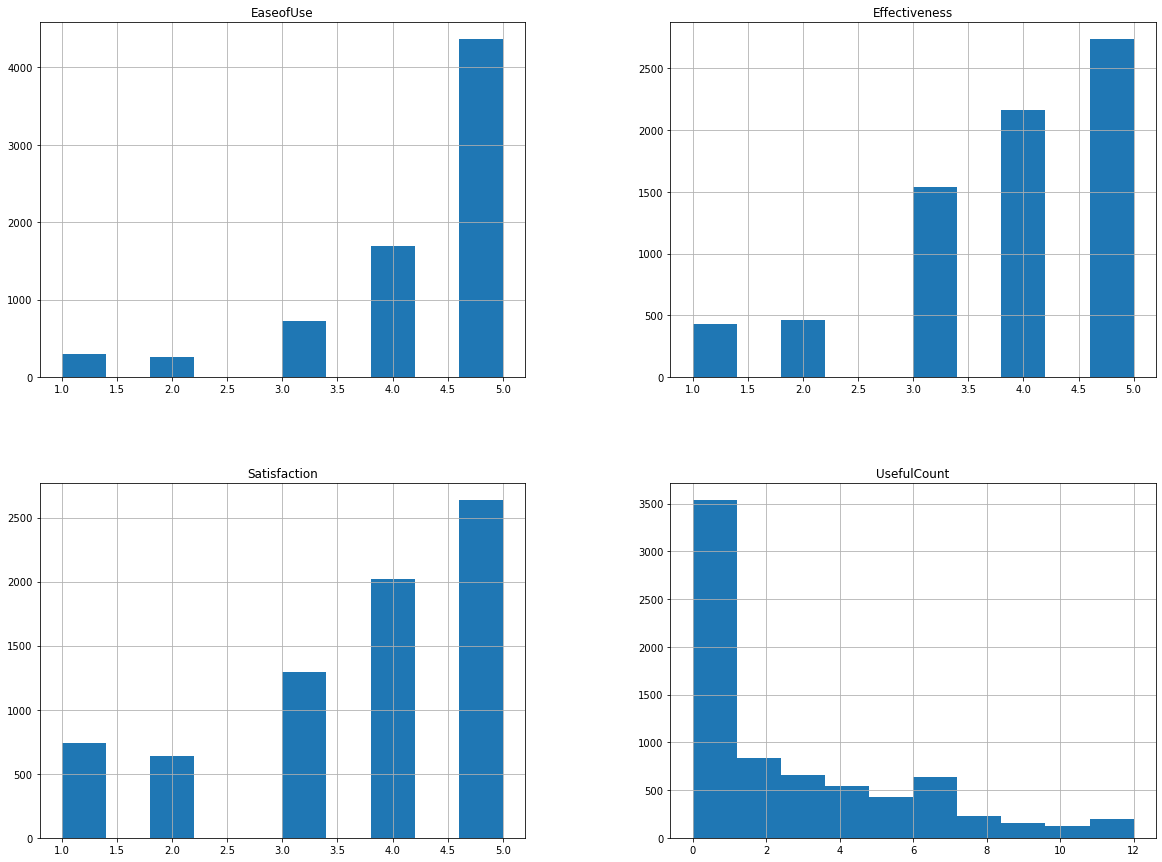

In [38]:
graph = data.select_dtypes(include=['int64']) 
graph.hist(figsize=(20,15))

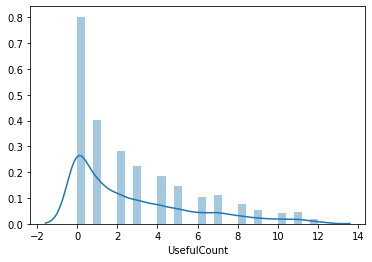

In [39]:
sns.distplot(data['UsefulCount'])

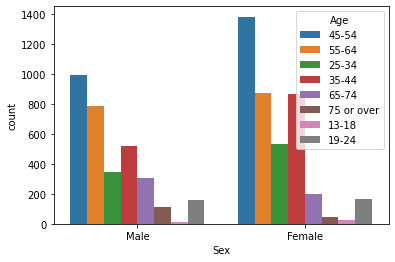

In [40]:
sns.countplot(data['Sex'],hue=data['Age'])

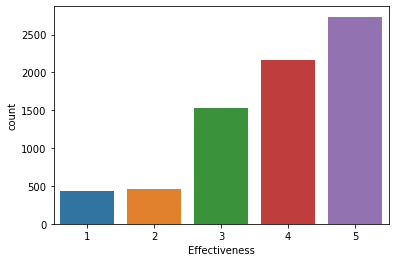

In [41]:
sns.countplot(data["Effectiveness"])

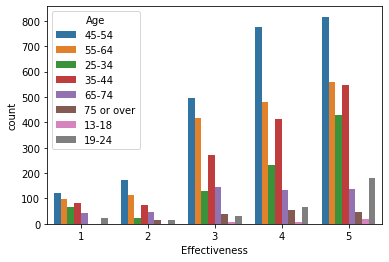

In [42]:
sns.countplot(data["Effectiveness"],hue=data['Age'])

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1800x1800 with 0 Axes>

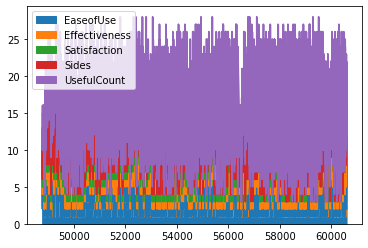

In [43]:
plt.figure(figsize=(25,25))
data.plot.area()
plt.show